C:\Users\Vostro\AppData\Local\Temp\ipykernel_16872\2668650622.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_summary, x='DayOfWeek', y='Arrival %', palette='Blues_d')


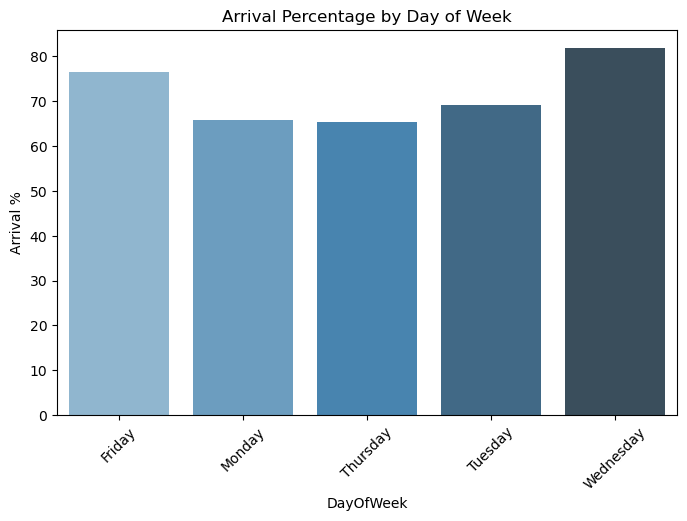

C:\Users\Vostro\AppData\Local\Temp\ipykernel_16872\2668650622.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=slot_summary, x='Slot', y='Arrival %', palette='Greens_d')


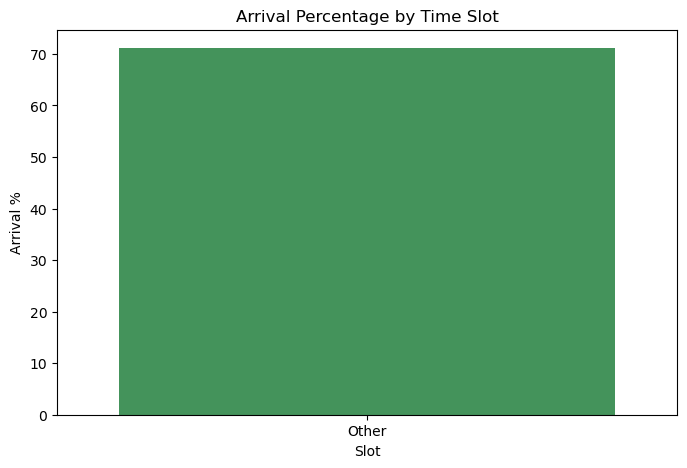

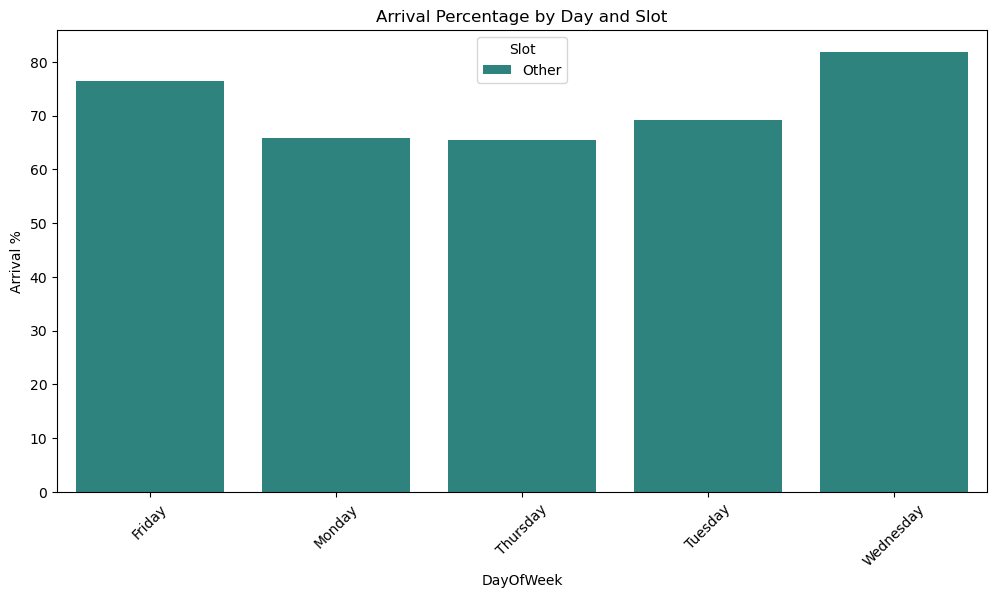

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Gesture.csv")

# --- Cleaning ---
df = df.dropna(subset=["Status"])  # drop empty rows
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y', errors='coerce')

# Arrived = 1 if Complete, else 0
df['Arrived'] = df['Status'].str.contains("Complete", case=False, na=False).astype(int)

# Add Day of Week
df['DayOfWeek'] = df['Date'].dt.day_name()



# Convert Time column
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p', errors='coerce')
df['Time_str'] = df['Time'].dt.strftime('%H:%M')

# Define slot mapping (10:00 + 10:20 → AM2, 11:30 + 11:50 → AM3)
slot_map = {
    "08:50": "AM1",
    "10:00": "AM2",
    "10:20": "AM2",
    "11:30": "AM3",
    "11:50": "AM3",
    "13:30": "PM1",
    "15:00": "PM2"
}

df['Slot'] = df['Time_str'].map(slot_map).fillna("Other")

# --- Analysis ---
# 1. Arrival percentage by Day
day_summary = df.groupby('DayOfWeek')['Arrived'].mean().reset_index()
day_summary['Arrival %'] = day_summary['Arrived'] * 100

plt.figure(figsize=(8,5))
sns.barplot(data=day_summary, x='DayOfWeek', y='Arrival %', palette='Blues_d')
plt.title("Arrival Percentage by Day of Week")
plt.ylabel("Arrival %")
plt.xticks(rotation=45)
plt.show()

# 2. Arrival percentage by Slot
slot_summary = df.groupby('Slot')['Arrived'].mean().reset_index()
slot_summary['Arrival %'] = slot_summary['Arrived'] * 100

plt.figure(figsize=(8,5))
sns.barplot(data=slot_summary, x='Slot', y='Arrival %', palette='Greens_d')
plt.title("Arrival Percentage by Time Slot")
plt.ylabel("Arrival %")
plt.show()

# 3. Arrival percentage by Day + Slot
arrival_slot = df.groupby(['DayOfWeek', 'Slot'])['Arrived'].mean().reset_index()
arrival_slot['Arrival %'] = arrival_slot['Arrived'] * 100

plt.figure(figsize=(12,6))
sns.barplot(data=arrival_slot, x='DayOfWeek', y='Arrival %', hue='Slot', palette='viridis')
plt.title("Arrival Percentage by Day and Slot")
plt.ylabel("Arrival %")
plt.xticks(rotation=45)
plt.legend(title="Slot")
plt.show()
